In [1]:
from pyopenms import *
import pandas as pd
import numpy as np
import os
import glob

input_mzml_files = glob.glob('results/interim/*.mzML')

raw_data=[]
for filename in input_mzml_files:
    exp= MSExperiment()
    MzMLFile().load(filename, exp)
    exp.sortSpectra(True)
    raw_data.append(exp)

ref_index = [i[0] for i in sorted(enumerate([exp.size() for exp in raw_data]), key=lambda x:x[1])][-1]
aligner = MapAlignmentAlgorithmPoseClustering()
aligner_par= aligner.getDefaults()
#aligner_par.setValue("max_num_peaks_considered", -1)
aligner.setParameters(aligner_par)
aligner.setReference(raw_data[ref_index])

for exp in raw_data[:ref_index] + raw_data[ref_index+1:]:
    trafo = TransformationDescription()
    aligner.align(exp, trafo)
    transformer = MapAlignmentTransformer()
    transformer.transformRetentionTimes(exp, trafo, True)

for exp in raw_data:    
    mzml_file = os.path.join("results", "", "FFMI", "", "interim", "", 'MapAligned_' + os.path.basename(exp.getLoadedFilePath())[19:-5] +".mzML")
    MzMLFile().store(mzml_file, exp)

Determination of memory status is not supported on this 
 platform, measuring for memoryleaks will never fail


In [2]:
from pyopenms import *
import pandas as pd
import numpy as np
import os
import glob
import csv
# read tsv file and create list of FeatureFinderMetaboIdentCompound
def metaboTableFromFile(path_to_library_file):
    metaboTable = []
    with open(path_to_library_file, 'r') as tsv_file:
        tsv_reader = csv.reader(tsv_file, delimiter="\t")
        next(tsv_reader) # skip header
        for row in tsv_reader:
            metaboTable.append(FeatureFinderMetaboIdentCompound(
                row[0], # name
                row[1], # sum formula
                float(row[2]), # mass
                [int(charge) for charge in row[3].split(',')], # charges
                [float(rt) for rt in row[4].split(',')], # RTs
                [float(rt_range) for rt_range in row[5].split(',')], # RT ranges
                [float(iso_distrib) for iso_distrib in row[6].split(',')] # isotope distributions
            ))
    return metaboTable

In [14]:
input_mzml_files=glob.glob("results/FFMI/interim/*.mzML")
# load ms data from mzML file into MSExperiment
for mzml_file in input_mzml_files:
    spectra = MSExperiment()
    MzMLFile().load(mzml_file, spectra)

    # create FeatureFinderAlgorithmMetaboIdent and assign ms data
    ff = FeatureFinderAlgorithmMetaboIdent()
    ff.setMSData(spectra)

    # read library generate a metabo table with compounds
    metabo_table = metaboTableFromFile('MetaboliteIdentification.tsv')

    # FeatureMap to store results
    fm = FeatureMap()

    # edit some parameters
    params = ff.getParameters()
    params[b'extract:mz_window'] = 3.0 
    #params[b'model:type']= b'asymmetric'
    params[b'extract:rt_window'] = 100.0
    params[b'detect:peak_width'] = 60.0  #adjust for wide peaks
    ff.setParameters(params)

    # run the FeatureFinderMetaboIdent with the metabo_table and store results in fm
    ff.run(metabo_table, fm)

    # save FeatureMap to file
    ff_file = os.path.join("results", "", "FFMI", "", "interim", "", 'FFMI_' + os.path.basename(mzml_file)[11:-5] +".featureXML")
    FeatureXMLFile().store(ff_file, fm)

RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 566.277276466771013.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770

Extracting chromatograms...
Detecting chromatographic peaks...
Found 8 feature candidates in total.
6 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 3 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.07656, Intercept: 0.656283
RT window size calculated as 240 seconds.


76466771073.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 588.340631304571048.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 1585.887276466771027.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 1586.890631304571116.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 1423.827276466770854.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 

Extracting chromatograms...
Detecting chromatographic peaks...
Found 6 feature candidates in total.
6 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 1 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1, Intercept: 0.479471
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 566.277276466771013.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770

Detecting chromatographic peaks...
Found 5 feature candidates in total.
5 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 3 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.57078, Intercept: -6.40039
RT window size calculated as 240 seconds.


631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 587.337276466771073.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 588.340631304571048.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 1585.887276466771027.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 1586.890631304571116.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 

Extracting chromatograms...
Detecting chromatographic peaks...
Found 8 feature candidates in total.
8 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 1 successes, 7 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1, Intercept: 0.847872
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Detecting chromatographic peaks...
Found 8 feature candidates in total.
6 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 4 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.511019, Intercept: 9.10492
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.12063130457102.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 797.417276466771.

Detecting chromatographic peaks...
Found 10 feature candidates in total.
8 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 3 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.0716744, Intercept: 11.3693
RT window size calculated as 240 seconds.
Extracting chromatograms...

Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570994.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 198.12063130457102.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 797.417276466771.


Detecting chromatographic peaks...
Found 13 feature candidates in total.
9 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 7 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.472061, Intercept: 8.31764
RT window size calculated as 240 seconds.
Extracting chromatograms...
Detecting chromatographic peaks...
Found 7 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 1 successes, 6 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1, Intercept: 3.12112
RT window size calculated as 240 seconds.


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Extracting chromatograms...
Detecting chromatographic peaks...
Found 8 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.3836, Intercept: -4.17214
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Detecting chromatographic peaks...
Found 7 feature candidates in total.
6 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 4 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1.02897, Intercept: 1.5923
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Detecting chromatographic peaks...
Found 8 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 1 successes, 6 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 1, Intercept: 0.871701
RT window size calculated as 240 seconds.
Extracting chromatograms...


Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 567.280631304570989.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 561.357276466771054.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 562.360631304571029.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 183.177276466770991.
Found no signal. The Gaussian width is probably smaller than the spacing in your chromatogram data. Try to use a bigger width. The error occurred in the chromatogram with m/z time 184.180631304570

Detecting chromatographic peaks...
Found 10 feature candidates in total.
7 features left after selection of best candidates.
No overlaps between features found.
Model fitting: 2 successes, 5 failures
Imputing model failures with a linear model based on log(rawIntensities). Slope: 0.894388, Intercept: 3.86956


In [15]:
from collections import defaultdict
from functools import reduce
from pathlib import Path
from time import perf_counter
import sys

from IPython.core.display import display
from pandas import CategoricalDtype
import numpy as np
from pyopenms import *
import pandas as pd
import os

common_meta_value_types = {
    b'label': 'U30',
    b'spectrum_index': 'i',
    b'score_fit': 'f',
    b'score_correlation': 'f',
    b'FWHM': 'f',
    b'spectrum_native_id': 'U30',
    b"num_of_masstraces" : "f"
}

class FeatureMapDF(FeatureMap):
    def __init__(self):
        super().__init__()
    
    # meta_values = None (default), 'all' or list of meta value names
    def get_df(self, meta_values = None):
        # get all possible meta value keys in a set
        if meta_values == 'all':
            meta_values = set()
            for f in self:
                mvs = []
                f.getKeys(mvs)
                for m in mvs:
                    meta_values.add(m)
        elif not meta_values: # if None, set to empty list
            meta_values = []
        
        def gen(fmap: FeatureMap, fun):
            for f in fmap:
                yield from fun(f, meta_values)

        def extract_meta_data(f: Feature, meta_values):
            pep = f.getPeptideIdentifications()  # type: list[PeptideIdentification]
            bb = f.getConvexHull().getBoundingBox2D()
                
            vals = [f.getMetaValue(m) if f.metaValueExists(m) else np.NA for m in meta_values]   # find some NA or None value for numpy
            
            if len(pep) != 0:
                hits = pep[0].getHits()

                if len(hits) != 0:
                    besthit = hits[0]  # type: PeptideHit
                    yield f.getUniqueId(), besthit.getSequence().toString(), f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()
                else:
                    yield f.getUniqueId(), None, f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()
            else:
                yield f.getUniqueId(), None, f.getCharge(), f.getRT(), f.getMZ(), bb[0][0], bb[1][0], f.getMetaValue("PeptideRef"), f.getOverallQuality(), f.getIntensity()

        cnt = self.size()

        mddtypes = [('id', np.dtype('uint64')), ('sequence', 'U200'), ('charge', 'i4'), ('RT', 'f'), ('mz', 'f'),
                    ('RTstart', 'f'), ('RTend', 'f'), ("PeptideRef", 'U200'),
                    ('quality', 'f'), ('intensity', 'f')]
        
        for meta_value in meta_values:
            if meta_value in common_meta_value_types:
                mddtypes.append((meta_value.decode(), common_meta_value_types[meta_value]))
            else:
                mddtypes.append((meta_value.decode(), 'U50'))
        mdarr = np.fromiter(iter=gen(self, extract_meta_data), dtype=mddtypes, count=cnt)
        df= pd.DataFrame(mdarr).set_index('id').sort_values("mz").drop(columns= "sequence")
        return df

In [16]:
input_feature_files = glob.glob('results/FFMI/interim/*.featureXML')

for filename in input_feature_files:
    fmap = FeatureMapDF()
    FeatureXMLFile().load(filename, fmap)
    DF= fmap.get_df()
    feature_csv= os.path.join("results", "", "FFMI", "", 'features_' + os.path.basename(filename)[:-10] +"csv")
    DF.to_csv(feature_csv)
    print(os.path.basename(filename))
    display(DF)
    #reduce RT window (way lower window if process) + peak width
    #quality : ask oliver alka/ 
    #process all raw data with Alignement etc - do not overwrite them
    #plot them to see the quality of peaks

FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
8500979853901519294,1,74.879845,155.077271,58.006424,96.752899,pyracrimycinB_m154.070007_z1_rt69.540001,-20.726585,1.007371e+06
3192602754625450971,1,63.282120,197.117279,54.288452,75.500534,GermicidinA_m196.110001_z1_rt52.169998,-36.900639,4.444709e+04
2899151621284869962,1,364.255280,585.357300,338.152344,389.962891,dehydroxynocardamine_m584.349976_z1_rt351.070007,0.803166,1.539434e+06
17856106182357010984,2,429.739929,712.417297,420.108124,448.799622,epemicinB_m1422.819946_z2_rt405.769989,-9.284290,7.080859e+04
12762211518570369650,2,384.744904,793.447266,361.596802,407.698273,epemicinA_m1584.880005_z2_rt386.850006,0.991519,1.163040e+08
11095095404145604418,1,392.044006,1423.827271,372.326447,412.424194,epemicinB_m1422.819946_z1_rt405.769989,1.023399,1.221317e+06


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
4269502784766240622,1,75.298477,155.077271,55.936054,96.599289,pyracrimycinB_m154.070007_z1_rt69.540001,-63.931732,1.664467e+04
8828306001553695781,1,101.204132,197.117279,70.793831,102.099854,GermicidinA_m196.110001_z1_rt52.169998,-51.162640,1.489897e+05
2105553356459239968,1,81.286392,402.207275,67.293434,97.087616,bioxalomycina2_m401.200012_z1_rt48.18,-48.943142,1.482424e+05
11204652831063873774,1,251.210129,566.277283,236.969101,265.425446,Coelichelin_m565.27002_z1_rt268.049988,-45.600380,1.485186e+05
11577840854294181200,1,334.994476,601.357300,314.617981,355.298462,desferrioxamineE_m600.349976_z1_rt329.5,-61.166908,1.620417e+05
3258095037346545660,2,386.933136,712.417297,372.991547,401.068268,epemicinB_m1422.819946_z2_rt405.769989,-42.871567,1.676834e+05
894542440287174930,2,390.473053,793.447266,362.768982,413.398376,epemicinA_m1584.880005_z2_rt386.850006,0.770661,3.580105e+06
16758472962477201879,1,404.996948,1423.827271,375.334076,426.820740,epemicinB_m1422.819946_z1_rt405.769989,-82.241638,1.856917e+05


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
7892315066378072645,1,101.490501,155.077271,81.856033,119.378067,pyracrimycinB_m154.070007_z1_rt69.540001,-6.691719,65884.476562
6853330827864678561,1,54.983295,197.117279,44.900742,63.736099,GermicidinA_m196.110001_z1_rt52.169998,-28.379456,2703.705078
2491389178770715059,1,295.306396,566.277283,273.596771,318.000946,Coelichelin_m565.27002_z1_rt268.049988,-5.558032,56629.761719
5622061683607235809,1,366.583923,587.337280,346.502319,388.036377,desmethylenylnocardamine_m586.330017_z1_rt339....,-64.694740,8075.395020
14048222380116593332,1,364.634308,601.357300,344.296600,379.395996,desferrioxamineE_m600.349976_z1_rt329.5,-55.497311,7933.792480
17907065593543676730,2,358.374786,793.447266,336.890656,380.467102,epemicinA_m1584.880005_z2_rt386.850006,-69.076401,90649.750000


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
14904810945415000302,1,74.296051,139.087280,59.566082,89.279213,pyracrimycinA_m138.080002_z1_rt50.82,-41.596272,5.542100e+05
3769015965081492114,1,83.254906,155.077271,68.789536,94.304352,pyracrimycinB_m154.070007_z1_rt69.540001,-41.902496,7.205609e+05
6005210009506683107,1,291.000824,566.277283,269.377563,313.571198,Coelichelin_m565.27002_z1_rt268.049988,-60.388779,1.211155e+06
1407654080616984555,2,405.769440,712.417297,384.058014,427.504883,epemicinB_m1422.819946_z2_rt405.769989,-19.246136,7.923354e+07
5930574734252459898,2,386.392456,793.447266,369.059753,405.814178,epemicinA_m1584.880005_z2_rt386.850006,1.076391,5.663995e+07
2008661310512280271,1,397.341858,1423.827271,372.897888,424.745728,epemicinB_m1422.819946_z1_rt405.769989,-4.631377,6.990318e+06


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
17358119217404746654,1,94.623482,139.087280,73.683678,100.801605,pyracrimycinA_m138.080002_z1_rt50.82,-43.783298,1.293653e+03
2545631174000927839,1,75.725914,155.077271,62.006271,92.908211,pyracrimycinB_m154.070007_z1_rt69.540001,-6.766133,1.054248e+06
15004833215529705277,1,84.914902,197.117279,71.853638,101.935471,GermicidinA_m196.110001_z1_rt52.169998,-48.728146,1.950038e+04
3866750124997318918,1,304.292694,566.277283,285.944824,318.022522,Coelichelin_m565.27002_z1_rt268.049988,-52.190815,1.037485e+03
15752674678185263959,2,424.310120,712.417297,403.720398,445.067291,epemicinB_m1422.819946_z2_rt405.769989,-63.263992,2.360191e+03
11791278861922722255,2,398.665985,793.447266,371.173309,421.383087,epemicinA_m1584.880005_z2_rt386.850006,-16.546993,1.246395e+07
6987307425563356966,1,417.131714,1423.827271,398.160614,436.131714,epemicinB_m1422.819946_z1_rt405.769989,-54.805977,1.097767e+03


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
15657351003276726074,1,50.467041,139.087280,44.336926,70.966637,pyracrimycinA_m138.080002_z1_rt50.82,-38.914307,6.356300e+04
4796791132925655198,1,74.125366,155.077271,65.126373,82.045914,pyracrimycinB_m154.070007_z1_rt69.540001,-27.082117,9.061598e+05
2184961462487233972,1,95.251793,402.207275,71.678543,98.114868,bioxalomycina2_m401.200012_z1_rt48.18,-43.912495,1.017670e+05
794827371125623909,1,297.275146,566.277283,282.028473,317.671783,Coelichelin_m565.27002_z1_rt268.049988,-51.406712,2.521218e+06
12574822004713721989,1,361.653961,587.337280,338.661957,389.677734,desmethylenylnocardamine_m586.330017_z1_rt339....,-78.721039,1.168179e+06
9185772469206394348,1,356.163422,601.357300,327.116486,379.167694,desferrioxamineE_m600.349976_z1_rt329.5,-9.189097,2.724626e+06
4867209182591008806,2,371.135376,793.447266,358.609192,388.313660,epemicinA_m1584.880005_z2_rt386.850006,-46.470367,3.653513e+05


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
549899854389036215,1,73.898109,155.077271,62.120972,86.151161,pyracrimycinB_m154.070007_z1_rt69.540001,-0.511163,2.470733e+05
6004923490657668150,1,86.454254,197.117279,71.948227,92.187897,GermicidinA_m196.110001_z1_rt52.169998,-32.034462,3.038175e+04
8868325433331202453,1,365.652527,585.357300,338.331635,390.664276,dehydroxynocardamine_m584.349976_z1_rt351.070007,0.680518,1.150619e+06
15168354923298256350,2,401.887848,712.417297,380.167572,428.198914,epemicinB_m1422.819946_z2_rt405.769989,-73.819008,1.497974e+06
11588015741097889132,2,394.638245,793.447266,367.929077,418.612091,epemicinA_m1584.880005_z2_rt386.850006,-13.056516,4.142528e+08
4291013436107372219,1,404.183655,1423.827271,388.571808,420.757172,epemicinB_m1422.819946_z1_rt405.769989,-52.656544,7.508501e+05


FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
58616284601168232,1,74.137680,155.077271,62.172176,87.016327,pyracrimycinB_m154.070007_z1_rt69.540001,-0.902786,1.342292e+05
3635119901134483895,1,73.043976,197.117279,65.230446,82.530899,GermicidinA_m196.110001_z1_rt52.169998,-27.339361,2.660637e+04
13637094688349588650,1,366.016022,585.357300,338.540253,390.929199,dehydroxynocardamine_m584.349976_z1_rt351.070007,0.758943,4.688250e+05
2594851336556632100,1,340.442688,601.357300,320.878815,360.018127,desferrioxamineE_m600.349976_z1_rt329.5,-59.391750,9.587195e+03
13166915918983081089,2,383.159790,712.417297,363.595825,406.056671,epemicinB_m1422.819946_z2_rt405.769989,0.066550,1.477418e+07
7284118218287388149,2,383.803528,793.447266,364.088470,417.275330,epemicinA_m1584.880005_z2_rt386.850006,-6.006571,5.644167e+07
7798114308040156316,1,386.455109,1423.827271,370.528870,411.999268,epemicinB_m1422.819946_z1_rt405.769989,-30.987978,5.224502e+05


FFMI_20210827_UMETAB219_POS_DNPM_Plate-2_MDNAWGS14_rep2.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
9027979057429024258,1,74.458687,155.077271,56.270535,94.443199,pyracrimycinB_m154.070007_z1_rt69.540001,-7.188227,1.210057e+06
13141858466405849151,1,61.142517,197.117279,45.004108,75.434708,GermicidinA_m196.110001_z1_rt52.169998,-4.367997,3.537292e+03
11354196553538528649,2,420.843079,712.417297,400.090240,441.589386,epemicinB_m1422.819946_z2_rt405.769989,5.385031,2.762860e+03
12040187139632939171,2,388.629181,793.447266,364.288849,413.691803,epemicinA_m1584.880005_z2_rt386.850006,0.817722,5.186931e+06
5220009061563632172,1,411.755157,1423.827271,390.532990,433.018585,epemicinB_m1422.819946_z1_rt405.769989,-61.605179,2.470740e+03


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep1.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
9306025001385953765,1,59.468048,155.077271,52.384476,66.559227,pyracrimycinB_m154.070007_z1_rt69.540001,-23.991562,2.246544e+05
9035821375408369684,1,66.093483,197.117279,55.039200,76.458984,GermicidinA_m196.110001_z1_rt52.169998,-33.251709,2.844691e+05
15880048231860269129,1,256.255432,561.357300,238.393936,275.739807,DesferrioxamineB_m560.349976_z1_rt225.770004,-60.999886,1.839847e+05
16621224896633308197,1,288.586212,566.277283,265.699280,312.085144,Coelichelin_m565.27002_z1_rt268.049988,-68.622078,4.581322e+05
11310739161528381571,1,368.695251,585.357300,350.115540,387.342712,dehydroxynocardamine_m584.349976_z1_rt351.070007,-57.153057,1.793855e+05
3348148654942953356,1,368.742706,601.357300,349.788574,379.350891,desferrioxamineE_m600.349976_z1_rt329.5,-8.888489,4.252331e+05
2095290620368505387,2,420.059570,712.417297,405.524902,431.299561,epemicinB_m1422.819946_z2_rt405.769989,-0.595947,5.170817e+05
17900184132086522,2,384.837189,793.447266,361.211273,408.044525,epemicinA_m1584.880005_z2_rt386.850006,1.033052,3.729555e+06
7884530516268793471,1,413.118103,1423.827271,380.129425,431.883026,epemicinB_m1422.819946_z1_rt405.769989,-5.494388,6.867817e+05


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_rep3.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
5593966281723588788,1,84.592918,155.077271,66.272507,102.987167,pyracrimycinB_m154.070007_z1_rt69.540001,-59.117859,1.474580e+04
4953373843868940748,1,70.322426,197.117279,60.553150,80.546822,GermicidinA_m196.110001_z1_rt52.169998,-31.281618,8.872741e+03
3732198405530586059,1,309.871521,566.277283,274.531830,317.992188,Coelichelin_m565.27002_z1_rt268.049988,-5.931147,2.362499e+05
9340909974330105087,1,356.771576,587.337280,337.231812,376.525848,desmethylenylnocardamine_m586.330017_z1_rt339....,-60.262684,1.086414e+04
16890559403582087819,1,350.080627,601.357300,332.113037,368.047974,desferrioxamineE_m600.349976_z1_rt329.5,-55.845093,4.070546e+04
11878756863456358391,2,443.443237,712.417297,402.361725,455.590271,epemicinB_m1422.819946_z2_rt405.769989,-79.088211,3.437367e+04
14057190163586988678,2,386.290649,793.447266,363.067688,408.729584,epemicinA_m1584.880005_z2_rt386.850006,-0.527396,3.180652e+07
18193008324719217856,1,405.797424,1423.827271,384.113861,427.495209,epemicinB_m1422.819946_z1_rt405.769989,-8.058062,1.630412e+05


FFMI_20210827_UMETAB219_POS_FPY12_Plate-2_MDNAWGS14_blank.featureXML


,charge,RT,mz,RTstart,RTend,PeptideRef,quality,intensity
id,,,,,,,,
11783495984047937408,1,66.760582,139.087280,50.876583,81.977608,pyracrimycinA_m138.080002_z1_rt50.82,-47.435040,121314.898438
266034284086595021,1,85.698631,155.077271,55.287560,104.150375,pyracrimycinB_m154.070007_z1_rt69.540001,-82.762863,233269.703125
2654375928891089066,1,84.020233,197.117279,69.194710,100.856277,GermicidinA_m196.110001_z1_rt52.169998,-49.249825,101607.898438
12417359116464313452,1,74.393120,402.207275,59.796684,86.812996,bioxalomycina2_m401.200012_z1_rt48.18,-39.907593,581933.500000
7768084474317551410,1,306.161804,566.277283,283.702148,318.036133,Coelichelin_m565.27002_z1_rt268.049988,-45.146580,918584.000000
14284604862516821788,2,413.651642,712.417297,392.010468,435.138855,epemicinB_m1422.819946_z2_rt405.769989,-69.373589,118938.398438
16490474689695533317,2,402.164307,793.447266,381.879700,422.569061,epemicinA_m1584.880005_z2_rt386.850006,-62.251389,119461.203125


In [16]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

filename = 'results/FFMI/interim/FFMI_20210827_UMETAB219_POS_ISP2_Plate-2_MDNAWGS14_blank.featureXML'

def plotDetectedFeatures3D(path_to_featureXML):
    fm = FeatureMap()
    fh = FeatureXMLFile()
    fh.load(path_to_featureXML, fm)

    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')

    for feature in fm:
        color = next(ax._get_lines.prop_cycler)['color']
        # chromatogram data is stored in the subordinates of the feature
        for i, sub in enumerate(feature.getSubordinates()):
            retention_times = [x[0] for x in sub.getConvexHulls()[0].getHullPoints()]
            intensities = [int(y[1]) for y in sub.getConvexHulls()[0].getHullPoints()]
            mz = sub.getMetaValue('MZ')
            ax.plot(retention_times, intensities, zs = mz, zdir = 'x', color = color)
            if i == 0:
                ax.text(mz,retention_times[0], max(intensities)*1.02, feature.getMetaValue('label'), color = color)

    ax.set_ylabel('time (s)')
    ax.set_xlabel('m/z')
    ax.set_zlabel('intensity (cps)')
    plt.show()


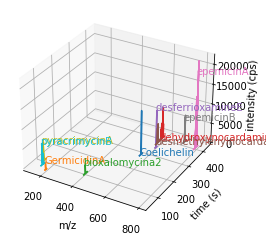

In [17]:
plotDetectedFeatures3D(filename)